In [83]:
import pandas as pd

df = pd.read_csv("../data/diabetes_feature.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_nan,Insulin_log
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,141.753906,4.821037
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,89.100847,0.522623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,14.000000,2.708050
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,102.500000,4.639572
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,102.500000,4.639572
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,169.500000,5.138735
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,846.000000,6.741701


# 학습과 예측에 사용할 데이터셋 만들기

In [84]:
# 전체 데이터셋
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
        'Insulin_nan', 'low_glu_insulin']]
y = df['Outcome']

X, y

(     Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
 0        148             72             35  33.6                     0.627   
 1         85             66             29  26.6                     0.351   
 2        183             64              0  23.3                     0.672   
 3         89             66             23  28.1                     0.167   
 4        137             40             35  43.1                     2.288   
 ..       ...            ...            ...   ...                       ...   
 763      101             76             48  32.9                     0.171   
 764      122             70             27  36.8                     0.340   
 765      121             72             23  26.2                     0.245   
 766      126             60              0  30.1                     0.349   
 767       93             70             31  30.4                     0.315   
 
      Age  Pregnancies_high  Insulin_nan  low_glu_

In [85]:
from sklearn.model_selection import train_test_split

# 햑습, 테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,169.5,False
435,141,0,0,42.4,0.205,29,False,169.5,False


In [86]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape

((614, 9), (614,), (154, 9), (614,))

# 학습과 예측하기


In [87]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)  # 학습
accuracy = model.score(X_test, y_test)  # 예측

accuracy  # 점수가 떨어짐 : 지난 모델의 경우 오버피팅이 발생하였음

0.8181818181818182

# 최적의 max_depth 파라미터값 찾기

In [88]:
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # 너무 작으면 underfitting, 너무 크면 overfitting
)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8571428571428571

[Text(0.42578125, 0.9166666666666666, 'Insulin_nan <= 121.0\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.234375, 0.75, 'Glucose <= 151.5\ngini = 0.125\nsamples = 343\nvalue = [320, 23]'),
 Text(0.15625, 0.5833333333333334, 'BMI <= 50.9\ngini = 0.093\nsamples = 327\nvalue = [311, 16]'),
 Text(0.125, 0.4166666666666667, 'Insulin_nan <= 109.0\ngini = 0.088\nsamples = 326\nvalue = [311, 15]'),
 Text(0.0625, 0.25, 'DiabetesPedigreeFunction <= 0.753\ngini = 0.064\nsamples = 304\nvalue = [294, 10]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.036\nsamples = 275\nvalue = [270, 5]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(0.1875, 0.25, 'Age <= 35.5\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1875, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [

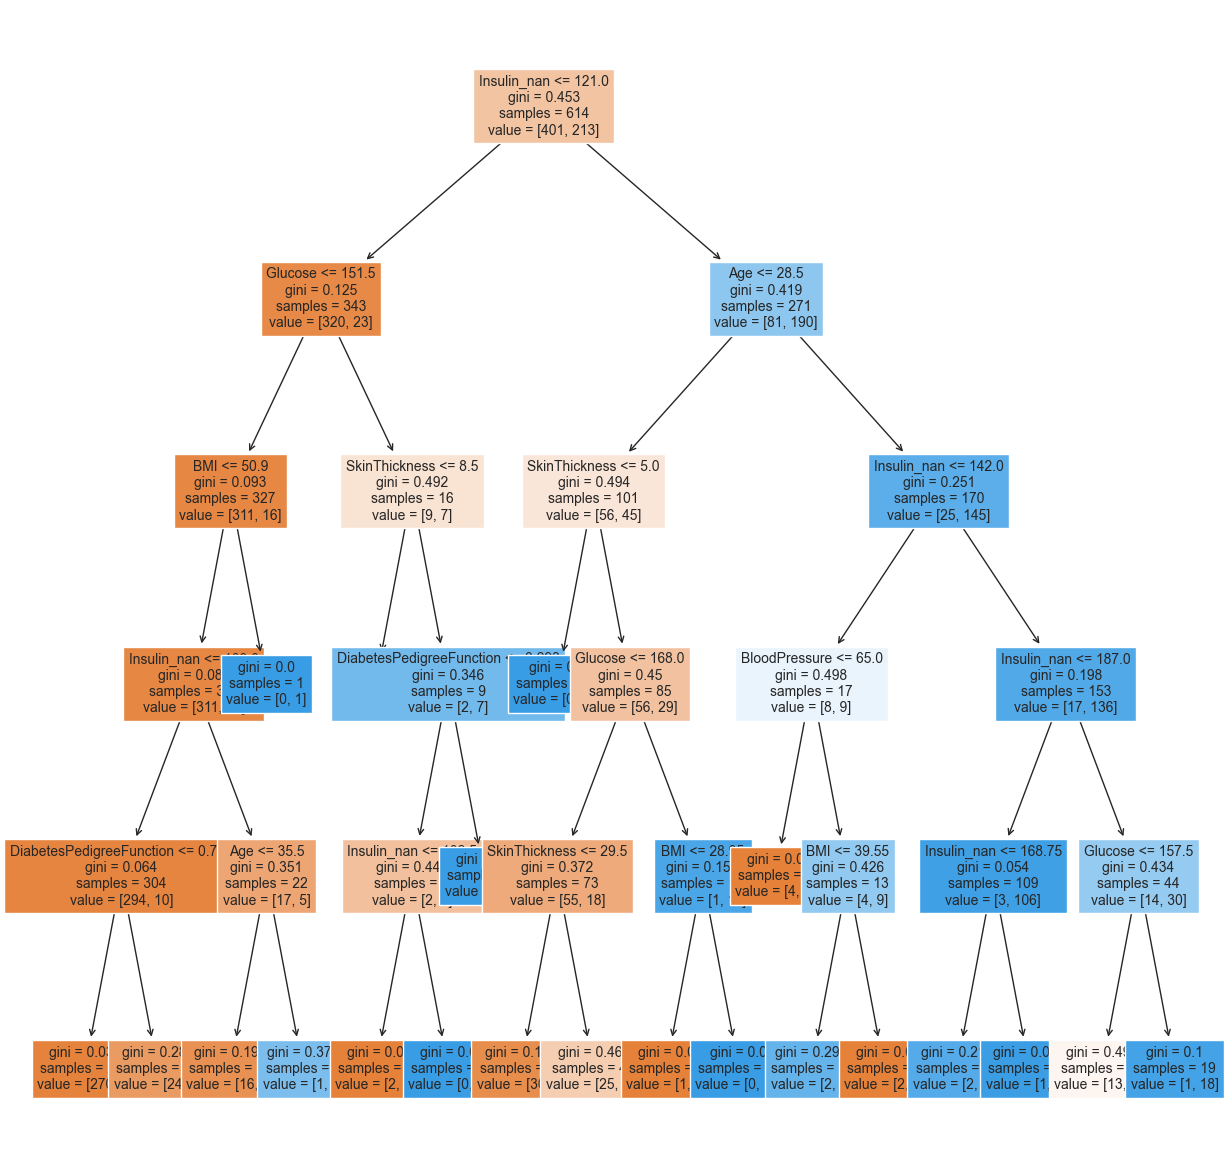

In [89]:
import matplotlib.pyplot as plt

feature_names = X_train.columns.tolist()

plt.figure(figsize=(15, 15))
plot_tree(model, filled=True, fontsize=10, feature_names=feature_names)


In [90]:
# for 문을 통해 max_depth 최적의 값 찾아내기
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(
        max_depth=max_depth,
    )
    model.fit(X_train, y_train)
    print(f"max_depth: {max_depth}, score: {model.score(X_test, y_test)}")


max_depth: 3, score: 0.8506493506493507
max_depth: 4, score: 0.8766233766233766
max_depth: 5, score: 0.8571428571428571
max_depth: 6, score: 0.8181818181818182
max_depth: 7, score: 0.8311688311688312
max_depth: 8, score: 0.8051948051948052
max_depth: 9, score: 0.8311688311688312
max_depth: 10, score: 0.8116883116883117
max_depth: 11, score: 0.8116883116883117


# GridSearchCV 를 사용해서 최적의 하이퍼 파라미터 값 찾기

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": range(3, 12),
    "max_features": [0.3, 0.5, 0.7, 0.9, 1],
}
clf = GridSearchCV(
    model,
    param_grid=param_grid,
    n_jobs=-1,  # -1: 모든 프로세서 사용
    cv=5,  # cross-validation) default: 5-fold
    verbose=2,
)
clf


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [92]:
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.score(X_test, y_test))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_depth': 5, 'max_features': 0.7}
0.8664934026389444
DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)
0.8701298701298701


In [93]:
import pandas as pd

pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.001162,0.000060,0.000434,0.000021,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.001202,0.000116,0.000491,0.000068,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.001333,0.000124,0.000466,0.000048,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.001361,0.000068,0.000424,0.000013,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.001280,0.000089,0.000433,0.000017,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5
17,0.001253,0.000065,0.000461,0.000064,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.861789,0.869919,0.804878,0.894309,0.860656,0.858310,0.029337,5
31,0.001174,0.000185,0.000432,0.000024,9,0.5,"{'max_depth': 9, 'max_features': 0.5}",0.853659,0.902439,0.780488,0.861789,0.885246,0.856724,0.041834,7
11,0.001072,0.000095,0.000443,0.000016,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",0.837398,0.878049,0.821138,0.878049,0.868852,0.856697,0.023222,8
1,0.003274,0.002831,0.000875,0.000456,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.780488,0.910569,0.813008,0.853659,0.918033,0.855151,0.053625,9
6,0.001168,0.000279,0.000441,0.000026,4,0.5,"{'max_depth': 4, 'max_features': 0.5}",0.788618,0.886179,0.804878,0.878049,0.918033,0.855151,0.049790,9


# RamdomSearchCV 를 사용해서 최적의 하이퍼 파라미터 값 찾기

- GridSearch 의 경우 지정된 값 내에서의 하이퍼파라미터 값만 찾을 수 있다.


In [102]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

model = DecisionTreeClassifier()
max_depth = np.random.random_integers(1, 20, 10)  # 1~20 사이의 10개의 값
max_features = np.random.uniform(0.4, 1.0, 100)  # 0.4 ~ 1.0 사이의 100개의 값
param_distributions = {
    "max_depth": max_depth,
    "max_features": max_features,
    "min_samples_split": list(range(2, 7)),
}
clf = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=100,  # n번을 돌면서 최적값을 찾음
    scoring="accuracy",  # 분류 문제이므로 accuracy 사용
    n_jobs=-1,
    cv=5,
    random_state=42,
)
clf


/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_88997/7859561.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 20 + 1) instead
  max_depth = np.random.random_integers(1, 20, 10)  # 1~20 사이의 10개의 값


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([14,  2,  2,  1,  9, 13, 13,  5, 14, 16]),
                                        'max_features': array([0.49691328, 0.93190342, 0.9348515 , 0.49234359, 0.51169152,
       0.79336411, 0.8847419 , 0.51638728, 0.85707057, 0.86843289,
       0.5424116 , 0.7323321 , 0.53978934, 0.44265011, 0.63305673,
       0.82134746, 0.8926613...
       0.71956505, 0.41194025, 0.45572476, 0.67910227, 0.64701927,
       0.43263691, 0.90466816, 0.83685851, 0.82527242, 0.88325471,
       0.59724298, 0.49606664, 0.52302948, 0.47763561, 0.70511916,
       0.74733162, 0.82983984, 0.85811683, 0.45475767, 0.54833074,
       0.74315502, 0.9264675 , 0.6439672 , 0.61618737, 0.92048666,
       0.64909164, 0.91448072, 0.83557558, 0.50998099, 0.96037241]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [103]:
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.score(X_test, y_test))


{'min_samples_split': 3, 'max_features': 0.49606663946277235, 'max_depth': 5}
0.8729708116753297
DecisionTreeClassifier(max_depth=5, max_features=0.49606663946277235,
                       min_samples_split=3)
0.8506493506493507


In [104]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,0.000902,0.000045,0.000459,0.000024,3,0.496067,5,"{'min_samples_split': 3, 'max_features': 0.496...",0.869919,0.910569,0.829268,0.878049,0.877049,0.872971,0.025982,1
29,0.001273,0.000138,0.000451,0.000032,3,0.835576,14,"{'min_samples_split': 3, 'max_features': 0.835...",0.861789,0.902439,0.845528,0.845528,0.901639,0.871385,0.025725,2
31,0.001883,0.001123,0.000726,0.000370,5,0.825272,14,"{'min_samples_split': 5, 'max_features': 0.825...",0.837398,0.894309,0.821138,0.878049,0.901639,0.866507,0.031768,3
69,0.001212,0.000355,0.000617,0.000314,6,0.652217,16,"{'min_samples_split': 6, 'max_features': 0.652...",0.886179,0.878049,0.845528,0.837398,0.877049,0.864841,0.019519,4
10,0.001392,0.000346,0.000471,0.000021,6,0.643967,9,"{'min_samples_split': 6, 'max_features': 0.643...",0.813008,0.926829,0.804878,0.853659,0.901639,0.860003,0.047931,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000886,0.000521,0.000542,0.000179,4,0.496067,1,"{'min_samples_split': 4, 'max_features': 0.496...",0.772358,0.756098,0.796748,0.731707,0.655738,0.742530,0.048298,96
30,0.000602,0.000017,0.000430,0.000011,4,0.643967,1,"{'min_samples_split': 4, 'max_features': 0.643...",0.642276,0.845528,0.796748,0.731707,0.655738,0.734400,0.078637,97
0,0.004466,0.003429,0.002196,0.002166,3,0.496913,1,"{'min_samples_split': 3, 'max_features': 0.496...",0.699187,0.650407,0.715447,0.650407,0.893443,0.721778,0.089674,98
34,0.000674,0.000091,0.000444,0.000027,2,0.566451,1,"{'min_samples_split': 2, 'max_features': 0.566...",0.658537,0.845528,0.626016,0.650407,0.737705,0.703639,0.080233,99


In [108]:
# parameter 조정

model = DecisionTreeClassifier()
max_depth = np.random.random_integers(1, 20, 10)  # 1~20 사이의 10개의 값
max_features = np.random.uniform(0.7, 1.0, 100)  # 0.4 ~ 1.0 사이의 100개의 값
param_distributions = {
    "max_depth": max_depth,
    "max_features": max_features,
    "min_samples_split": list(range(2, 7)),
}
clf = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=1000,  # n번을 돌면서 최적값을 찾음
    scoring="accuracy",  # 분류 문제이므로 accuracy 사용
    n_jobs=-1,
    cv=5,
    random_state=42,
)
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.score(X_test, y_test))
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")

/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_88997/3927067743.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 20 + 1) instead
  max_depth = np.random.random_integers(1, 20, 10)  # 1~20 사이의 10개의 값


0.8795148607223778
0.8246753246753247


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
928,0.001371,0.000095,0.000444,0.000008,4,0.985958,17,"{'min_samples_split': 4, 'max_features': 0.985...",0.878049,0.934959,0.796748,0.886179,0.901639,0.879515,0.045739,1
736,0.001237,0.000264,0.000690,0.000491,5,0.775312,13,"{'min_samples_split': 5, 'max_features': 0.775...",0.869919,0.886179,0.829268,0.878049,0.918033,0.876289,0.028618,2
826,0.002020,0.000736,0.000690,0.000386,4,0.940009,17,"{'min_samples_split': 4, 'max_features': 0.940...",0.861789,0.878049,0.813008,0.894309,0.918033,0.873037,0.035305,3
663,0.001490,0.000612,0.000848,0.000803,6,0.806889,18,"{'min_samples_split': 6, 'max_features': 0.806...",0.861789,0.902439,0.821138,0.869919,0.901639,0.871385,0.029996,4
318,0.004725,0.005371,0.000533,0.000073,4,0.807041,4,"{'min_samples_split': 4, 'max_features': 0.807...",0.869919,0.894309,0.837398,0.869919,0.885246,0.871358,0.019375,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000633,0.000009,0.000425,0.000005,5,0.740974,1,"{'min_samples_split': 5, 'max_features': 0.740...",0.699187,0.756098,0.796748,0.731707,0.737705,0.744289,0.032023,996
102,0.000673,0.000041,0.000436,0.000007,3,0.774948,1,"{'min_samples_split': 3, 'max_features': 0.774...",0.772358,0.756098,0.796748,0.731707,0.663934,0.744169,0.045375,997
750,0.000661,0.000059,0.000468,0.000064,4,0.754481,1,"{'min_samples_split': 4, 'max_features': 0.754...",0.772358,0.756098,0.715447,0.731707,0.737705,0.742663,0.019736,998
915,0.000826,0.000251,0.000471,0.000044,4,0.740974,1,"{'min_samples_split': 4, 'max_features': 0.740...",0.772358,0.756098,0.715447,0.804878,0.655738,0.740904,0.051409,999
